In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import matplotlib

from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from dataclasses import dataclass

In [13]:
def show_frame(arr: np.ndarray):
    cv.imshow('Frame', arr)

    while True:
        # Exit if 'q' is pressed
        if cv.waitKey(1) & 0xFF == ord('q'):
            break
        elif cv.waitKey(1) == 32: 
            break


In [14]:
cap_segmentation = cv.VideoCapture(r"..\..\datasets\unzipped\endovis\Segmentation_Robotic_Training\Training\Dataset4\Segmentation.avi")
cap_video = cv.VideoCapture(r"..\..\datasets\unzipped\endovis\Segmentation_Robotic_Training\Training\Dataset4\Video.avi")
stop = False
    
frame_number = 0
ret_seg, frame_seg = cap_segmentation.read()
ret_vid, frame_vid = cap_video.read()

if frame_seg is None or frame_vid is None:
    print("End of video, will fail")

frame_vid_copy = cv.cvtColor(cv.GaussianBlur(frame_vid.copy(), (5,5), 1), code = cv.COLOR_BGR2HSV_FULL)

hue = frame_vid_copy[:,:,0]
saturation = frame_vid_copy[:,:,1]
value = frame_vid_copy[:,:,2]

hue_edited = cv.inRange(hue, 32, 223)
value_edited = cv.inRange(value, 0, 127)
segmented = cv.bitwise_and(hue_edited, value_edited)

vis = np.concatenate((cv.cvtColor(frame_seg, code = cv.COLOR_BGR2GRAY), segmented), axis=0)

show_frame(frame_vid)
show_frame(np.concatenate((hue_edited, value_edited), axis = 1))
show_frame(segmented)
                                                                
cv.destroyAllWindows()
cap_segmentation.release()
cap_video.release()

KeyboardInterrupt: 

In [3]:
cap_segmentation = cv.VideoCapture(r"..\..\datasets\unzipped\endovis\Segmentation_Robotic_Training\Training\Dataset4\Segmentation.avi")
cap_video = cv.VideoCapture(r"..\..\datasets\unzipped\endovis\Segmentation_Robotic_Training\Training\Dataset4\Video.avi")
stop = False
    
frame_number = 0

while (not stop):
    ret_seg, frame_seg = cap_segmentation.read()
    ret_vid, frame_vid = cap_video.read()
    if frame_seg is None or frame_vid is None:
        print("End of video, breaking")
        break

    frame_vid_copy = frame_vid.copy()
    # frame_vid_copy: np.ndarray = cv.medianBlur(frame_vid_copy, 5) / 255.0
    frame_vid_copy: np.ndarray = cv.Canny(frame_vid_copy, 50, 150) / 255.0

    # w, h, _ = frame_vid_copy.shape
    w, h = frame_vid_copy.shape

    # Perform K-Means w/ n=3 clusters. Reshape image into 1D vector
    k = KMeans(n_clusters = 3, n_init = 'auto')
    # k.fit(frame_vid_copy.reshape((w*h, 3)))

    # # Get clusters, resize image to original dimensions (just 2D for grayscale)
    # im = k.cluster_centers_[k.labels_].reshape((w, h, 3))
    k.fit(frame_vid_copy.reshape((w*h, 1)))

    # Get clusters, resize image to original dimensions (just 2D for grayscale)
    im = k.cluster_centers_[k.labels_].reshape((w, h, 1))

    im = np.array(im * 255.0, dtype = np.uint8)
    np.unique(im)

    # vis = np.concatenate((frame_vid, im, frame_seg), axis=1)

    cv.imshow('kmeans_example_canny.png', im)
    
    frame_number += 1
    
    while True:
        # Exit if 'q' is pressed
        if cv.waitKey(25) & 0xFF == ord('q'):
            stop = True
            break
        elif cv.waitKey(33) == 32: 
            break
                                                                
cv.destroyAllWindows()
cap_segmentation.release()
cap_video.release()

C:\Users\thegr\AppData\Local\Temp\ipykernel_29800\4068104402.py:27: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  k.fit(frame_vid_copy.reshape((w*h, 1)))


KeyboardInterrupt: 

In [5]:
cap_segmentation = cv.VideoCapture(r"..\..\datasets\unzipped\endovis\Segmentation_Robotic_Training\Training\Dataset4\Segmentation.avi")
cap_video = cv.VideoCapture(r"..\..\datasets\unzipped\endovis\Segmentation_Robotic_Training\Training\Dataset4\Video.avi")
stop = False
    
frame_number = 0

while (not stop):
    ret_seg, frame_seg = cap_segmentation.read()
    ret_vid, frame_vid = cap_video.read()
    if frame_seg is None or frame_vid is None:
        print("End of video, breaking")
        break

    frame_vid_copy = frame_vid.copy()
    frame_vid_copy: np.ndarray = cv.cvtColor(frame_vid_copy, code = cv.COLOR_BGR2HSV_FULL)

    hue = frame_vid_copy[:,:,0]
    saturation = frame_vid_copy[:,:,1]
    value = frame_vid_copy[:,:,2]

    hue_edited = hue.copy()
    value_edited = hue.copy()

    pxl_hue = []
    pxl_value = []
    pxl_value_gray = []

    for i in range(hue.shape[0]):
        for j in range(hue.shape[1]):
            if hue[i,j] < 32 or hue[i,j] > 223:
                hue_edited[i,j] = 0
            else:
                pxl_hue.append((i,j))

            if value[i,j] < 75:
                pxl_value.append((i,j))

            if value[i,j] < 150 and value[i,j] > 100:
                pxl_value_gray.append((i,j))

    masked_img = frame_vid.copy()
    for i, j in pxl_hue:
        masked_img[i, j, 0] = 0
        masked_img[i, j, 1] = 0
        masked_img[i, j, 2] = 0

    masked_img2 = frame_vid.copy()
    for i, j in pxl_value:
        masked_img2[i, j, 0] = 0
        masked_img2[i, j, 1] = 0
        masked_img2[i, j, 2] = 0

    masked_img3 = np.zeros(shape = frame_vid.shape, dtype = np.uint8)
    for i in range(masked_img3.shape[0]):
        for j in range(masked_img3.shape[1]):
            if not (masked_img[i,j,0] == 0 and masked_img2[i,j,0] == 0):
                masked_img3[i,j,0] = 255
                masked_img3[i,j,1] = 255
                masked_img3[i,j,2] = 255

    masked_img_gray = frame_vid.copy()
    for i, j in pxl_value_gray:
        masked_img_gray[i, j, 0] = 0
        masked_img_gray[i, j, 1] = 0
        masked_img_gray[i, j, 2] = 0

    # # Perform K-Means w/ n=3 clusters. Reshape image into 1D vector
    # k = KMeans(n_clusters = 3)
    # k.fit(frame_vid_copy.reshape((w*h, 3)))

    # # Get clusters, resize image to original dimensions (just 2D for grayscale)
    # im = k.cluster_centers_[k.labels_].reshape((w, h, 3))
    # im = np.array(im * 255.0, dtype = np.uint8)

    # vis = np.concatenate((frame_vid, frame_seg), axis=1)
    # vis = np.concatenate((frame_vid_copy[:,:,0], frame_vid_copy[:,:,1], frame_vid_copy[:,:,2]), axis=1)

    cv.imshow('Frame', np.concatenate((masked_img, masked_img2, cv.medianBlur(masked_img3, 3)), axis=1))
    # cv.imshow('Frame', np.concatenate((value, masked_img_gray[:,:,0]), axis = 1))

    frame_number += 1
    
    while True:
        # Exit if 'q' is pressed
        if cv.waitKey(1) & 0xFF == ord('q'):
            stop = True
            break
        elif cv.waitKey(1) == 32: 
            break

    
                                                                
cv.destroyAllWindows()
cap_segmentation.release()
cap_video.release()

In [20]:
cap_segmentation = cv.VideoCapture(r"..\datasets\unzipped\endovis\Segmentation_Robotic_Training\Training\Dataset4\Segmentation.avi")
cap_video = cv.VideoCapture(r"..\datasets\unzipped\endovis\Segmentation_Robotic_Training\Training\Dataset4\Video.avi")
stop = False
    
frame_number = 0

while (not stop):
    ret_seg, frame_seg = cap_segmentation.read()
    ret_vid, frame_vid = cap_video.read()
    if frame_seg is None or frame_vid is None:
        print("End of video, breaking")
        break

    # Convert image to grayscale
    gray = cv.cvtColor(frame_vid.copy(), cv.COLOR_BGR2GRAY)

    # Take x and y gradients
    grad_x = cv.Sobel(gray, cv.CV_16S, 1, 0, ksize=5)
    grad_y = cv.Sobel(gray, cv.CV_16S, 0, 1, ksize=5)

    # Convert data back to unsigned 8-bit integer 
    abs_grad_x = cv.convertScaleAbs(grad_x)
    abs_grad_y = cv.convertScaleAbs(grad_y)

    # Compute weighted sum of x and y gradients
    grad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

    w, h = np.array(grad, dtype = np.uint8).shape

    # Perform K-Means w/ n=2 clusters. Reshape image into 1D vector
    k = KMeans(n_clusters = 2)
    k.fit(grad.reshape((w*h, 1)))

    # Get clusters, resize image to original dimensions (just 2D for grayscale)
    im = k.cluster_centers_[k.labels_].reshape((w,h))
    
    # # Perform K-Means w/ n=3 clusters. Reshape image into 1D vector
    # k = KMeans(n_clusters = 3)
    # k.fit(frame_vid_copy.reshape((w*h, 3)))

    # # Get clusters, resize image to original dimensions (just 2D for grayscale)
    # im = k.cluster_centers_[k.labels_].reshape((w, h, 3))
    # im = np.array(im * 255.0, dtype = np.uint8)

    # vis = np.concatenate((frame_vid, frame_seg), axis=1)
    # vis = np.concatenate((frame_vid_copy[:,:,0], frame_vid_copy[:,:,1], frame_vid_copy[:,:,2]), axis=1)

    cv.imshow('Frame', np.concatenate((grad, im), axis=1))

    frame_number += 1
    
    while True:
        # Exit if 'q' is pressed
        if cv.waitKey(1) & 0xFF == ord('q'):
            stop = True
            break
        elif cv.waitKey(1) == 32: 
            break

    
                                                                
cv.destroyAllWindows()
cap_segmentation.release()
cap_video.release()

c:\Users\thegr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
cap_segmentation = cv.VideoCapture(r"..\datasets\unzipped\endovis\Segmentation_Robotic_Training\Training\Dataset4\Segmentation.avi")
cap_video = cv.VideoCapture(r"..\datasets\unzipped\endovis\Segmentation_Robotic_Training\Training\Dataset4\Video.avi")
stop = False
    
frame_number = 0

while (not stop):
    ret_seg, frame_seg = cap_segmentation.read()
    ret_vid, frame_vid = cap_video.read()
    if frame_seg is None or frame_vid is None:
        print("End of video, breaking")
        break

    # Convert image to grayscale
    gray = cv.cvtColor(frame_vid.copy(), cv.COLOR_BGR2GRAY)

    # Take x and y gradients
    grad_x = cv.Sobel(gray, cv.CV_16S, 1, 0, ksize=1)
    grad_y = cv.Sobel(gray, cv.CV_16S, 0, 1, ksize=1)

    # Convert data back to unsigned 8-bit integer 
    abs_grad_x = cv.convertScaleAbs(grad_x)
    abs_grad_y = cv.convertScaleAbs(grad_y)

    # Compute weighted sum of x and y gradients
    grad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

    w, h = np.array(grad, dtype = np.uint8).shape

    # Perform K-Means w/ n=2 clusters. Reshape image into 1D vector
    k = KMeans(n_clusters = 2)
    k.fit(grad.reshape((w*h, 1)))

    # Get clusters, resize image to original dimensions (just 2D for grayscale)
    im = k.cluster_centers_[k.labels_].reshape((w,h))
    
    # # Perform K-Means w/ n=3 clusters. Reshape image into 1D vector
    # k = KMeans(n_clusters = 3)
    # k.fit(frame_vid_copy.reshape((w*h, 3)))

    # # Get clusters, resize image to original dimensions (just 2D for grayscale)
    # im = k.cluster_centers_[k.labels_].reshape((w, h, 3))
    # im = np.array(im * 255.0, dtype = np.uint8)

    # vis = np.concatenate((frame_vid, frame_seg), axis=1)
    # vis = np.concatenate((frame_vid_copy[:,:,0], frame_vid_copy[:,:,1], frame_vid_copy[:,:,2]), axis=1)

    cv.imshow('Frame', cv.Canny(cv.cvtColor(frame_vid, code = cv.COLOR_BGR2GRAY).copy(), 240, 255))

    frame_number += 1
    
    while True:
        # Exit if 'q' is pressed
        if cv.waitKey(1) & 0xFF == ord('q'):
            stop = True
            break
        elif cv.waitKey(1) == 32: 
            break

    
                                                                
cv.destroyAllWindows()
cap_segmentation.release()
cap_video.release()

In [24]:
cap_segmentation = cv.VideoCapture(r"..\datasets\unzipped\endovis\Segmentation_Robotic_Training\Training\Dataset4\Segmentation.avi")
cap_video = cv.VideoCapture(r"..\datasets\unzipped\endovis\Segmentation_Robotic_Training\Training\Dataset4\Video.avi")
stop = False
    
frame_number = 0

while (not stop):
    ret_seg, frame_seg = cap_segmentation.read()
    ret_vid, frame_vid = cap_video.read()
    if frame_seg is None or frame_vid is None:
        print("End of video, breaking")
        break

    gray = cv.cvtColor(frame_vid, code = cv.COLOR_BGR2GRAY)
    gauss_filt = cv.GaussianBlur(gray, (5,5), 1.0)
    canny_edge = cv.Canny(gauss_filt, 0, 350, apertureSize = 3, L2gradient = False)
    # cv.imshow('Frame', np.concatenate((gray, canny_edge), axis = 1))
    
    # while True:
    #     # Exit if 'q' is pressed
    #     if cv.waitKey(1) & 0xFF == ord('q'):
    #         stop = True
    #         break
    #     elif cv.waitKey(1) == 32: 
    #         break
    # break

    hough_lines = cv.HoughLines(
        image = canny_edge,
        rho = 1,
        theta = np.radians(1.0),
        threshold = 75,
    )

    if hough_lines is not None:
        print("none found")
        im_copy = frame_vid.copy()
        for i in range(0, len(hough_lines)):
            rho = hough_lines[i][0][0]
            theta = hough_lines[i][0][1]
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv.line(im_copy, pt1, pt2, (0,0,255), 1, cv.LINE_AA)


        cv.imwrite("hough_lines.png", np.concatenate((frame_vid, cv.cvtColor(canny_edge, code = cv.COLOR_GRAY2BGR), im_copy), axis = 1))   

        while True:
            # Exit if 'q' is pressed
            if cv.waitKey(1) & 0xFF == ord('q'):
                stop = True
                break
            elif cv.waitKey(1) == 32: 
                break
    else:
        break

                                                        
cv.destroyAllWindows()
cap_segmentation.release()
cap_video.release()

none found


In [ ]:
cap_video = cv.VideoCapture(r"..\datasets\unzipped\endovis\Segmentation_Robotic_Training\Training\Dataset4\Video.avi")

ret_vid, frame_vid = cap_video.read()
compressed_im = cv.resize(frame_vid, (frame_vid.shape[1] // 10, frame_vid.shape[0] // 10))
# Repeat for RGB image
dim = (np.prod(compressed_im.shape[:2]), 3)

bw = estimate_bandwidth((compressed_im / 255.0).reshape(dim))
ms = MeanShift(bandwidth = bw)
ms.fit((compressed_im / 255.0).reshape(dim))

# # Get clusters + reshape
im = ms.cluster_centers_[ms.labels_].reshape(compressed_im.shape)

c:\Users\thegr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


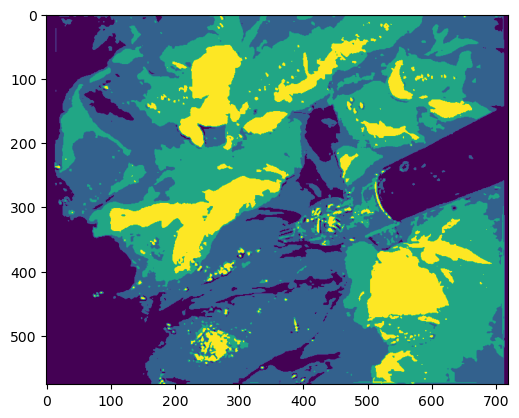

In [22]:
gs = cv.cvtColor(frame_vid, code = cv.COLOR_BGR2GRAY)
gs_blurred = cv.GaussianBlur(gs, (3,3), 10.0)

w, h = gs.shape

k = KMeans(n_clusters = 4)
k.fit(gs_blurred.reshape((gs.shape[0] * gs.shape[1], 1)))
im = k.cluster_centers_[k.labels_].reshape((w,h))
plt.imshow(im)